# Final Project

***provided code***

In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
import h5py

In [ ]:
%%time
df = pd.read_csv('https://astro.uchicago.edu/~andrey/classes/a211/data/training_solutions_rev1.csv')

In [3]:
print("Column headings:")
print(df.columns)

Column headings:
Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')


In [44]:
# print the first 10 GalaxyIDs 
print(df['GalaxyID'][:10])

0    100008
1    100023
2    100053
3    100078
4    100090
5    100122
6    100123
7    100128
8    100134
9    100143
Name: GalaxyID, dtype: int64


In [45]:
# print the first 10 GalaxyIDs, pell, pdisk 
for i in range(10):
    # Class 1.1 = probability that galaxy has "elliptical" morphology
    # Class 1.2 = probability that galaxy has "disk" morphology
    # Class 1.3 = probability that object is a star, not used here, but
    # in principle can be used to clean sample. 
    print("%d6   %.6f   %.6f"%(df['GalaxyID'][i], df['Class1.1'][i], df['Class1.2'][i]))

1000086   0.383147   0.616853
1000236   0.327001   0.663777
1000536   0.765717   0.177352
1000786   0.693377   0.238564
1000906   0.933839   0.000000
1001226   0.738832   0.238159
1001236   0.462492   0.456033
1001286   0.687783   0.288344
1001346   0.021834   0.976952
1001436   0.269843   0.730157


In [4]:
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def zoo_img_collage(gal_id, nrow, ncol, path=None, savefig=None):
    """
    display a collage of images of galaxies from the Galaxy Zoo 
    located in the directory path
    """
    fig, axs = plt.subplots(nrow, ncol, figsize=(ncol, nrow))

    # Check that PIL is installed for jpg support
    if 'jpg' not in fig.canvas.get_supported_filetypes():
        raise ValueError("PIL required to load SDSS jpeg images")

    for _gid, ax in zip(gal_id, axs.flatten()):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        
        outfile = path+str(_gid)+'.jpg'
        I = Image.open(outfile)
        ax.imshow(I, origin='lower')
        ax.set_aspect('auto')
        
    fig.subplots_adjust(hspace=0, wspace=0)
    if savefig != None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


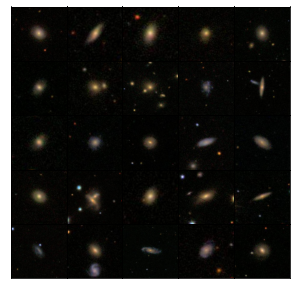

In [7]:
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'


ngal = 25
nrow = 5; ncol = 5
gal_id = df['GalaxyID'][:ngal]

zoo_img_collage(gal_id, nrow, ncol, path=path, savefig=None)

In [18]:
# displaying pixel values of an image 
# ID of the first galaxy
gal_id = df['GalaxyID'][0]
# path to the image
img_file = path+str(gal_id)+'.jpg'
# open image
im = Image.open(img_file)
# convert image to pixel values of R,G,B
pixels = np.asarray(im)
# this will show us that we deal with 424 x 424 pixel images with 3 color channels: R, G, B
print(np.shape(pixels))

(424, 424, 3)


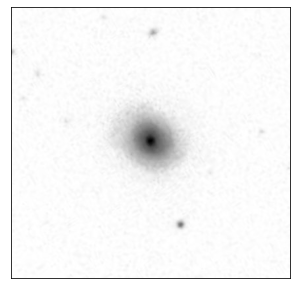

In [19]:
# using "luminosity" method
lum = 0.21 *pixels[:,:,0] + 0.72 * pixels[:,:,1] + 0.07 * pixels[:,:,2]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.imshow(lum, origin='lower', cmap='Greys')
ax.set_aspect('auto')
# plt.savefig(path+str(gal_id)+'_gsts2.jpeg', bbox_inches='tight', pad_inches = 0)
# plt.imsave(path+str(gal_id)+'_gsts3.jpeg',lum, cmap="Greys")

plt.show()

In [20]:
lum.shape

(424, 424)

In [10]:
from skimage.io import imread_collection

#your path 
col_dir = path+'100*.jpg'

#creating a collection with the available images
col = imread_collection(col_dir)

In [11]:
print(np.shape(col))

(64, 424, 424, 3)


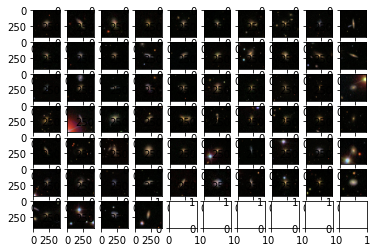

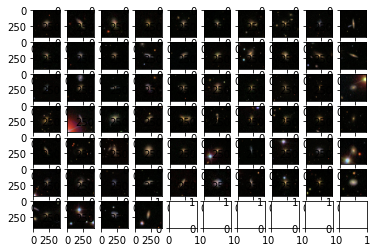

In [12]:
from skimage.io import imshow_collection

imshow_collection(col)

***convert all images to grey-scale***

In [25]:
%%time
savepath = '/Users/avery/astr211/hw_assignments/project/grayimages_training_rev1/'

for i in range(0,61578):
    # displaying pixel values of an image 
    # ID of the first galaxy
    gal_id = df['GalaxyID'][i]
    # path to the image
    img_file = path+str(gal_id)+'.jpg'
    # open image
    im = Image.open(img_file)
    # convert image to pixel values of R,G,B
    pixels = np.asarray(im)

    # using "luminosity" method
    lum = 0.21 *pixels[:,:,0] + 0.72 * pixels[:,:,1] + 0.07 * pixels[:,:,2]

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(lum, origin='lower', cmap='Greys')
    ax.set_aspect('auto')
    # plt.savefig(path+str(gal_id)+'_gsts2.jpg', bbox_inches='tight', pad_inches = 0)
    plt.imsave(savepath+str(gal_id)+'_gs.jpg',lum, cmap="Greys")
    
    plt.close()

#     plt.show()

CPU times: user 30min 28s, sys: 11min 43s, total: 42min 11s
Wall time: 48min 45s


## **create training, validation, and test samples from the images**

In [4]:
savepath = '/Users/avery/astr211/hw_assignments/project/grayimages_training_rev1/'

In [7]:
%%time
# i'm not sure if this is the best approach, but I'm going to create a numpy array in which each element is the array of 
# pixel values for a given image

savepath = '/Users/avery/astr211/hw_assignments/project/grayimages_training_rev1/'

allpixval = []

for j in range(0,61578):
    # displaying pixel values of an image 
    # ID of the first galaxy
    gal_id = df['GalaxyID'][j]
    # path to the image
    img_file = savepath+str(gal_id)+'_gs.jpg'
    # open image
    im = Image.open(img_file)
    # convert image to pixel values
    pixels = np.asarray(im)
    lum = pixels[:,:,0] + pixels[:,:,1] + pixels[:,:,2]
    allpixval.append(lum)
    im.close()
    
allpixval = np.array(allpixval)

CPU times: user 2min 17s, sys: 44.5 s, total: 3min 1s
Wall time: 4min 7s


In [ ]:
positivepath + '/' + 

In [12]:
np.save('/Users/avery/astr211/hw_assignments/project/allpixval.npy',allpixval)

In [38]:
for n in range(0, 61578):
    pell = df['Class1.1'][n]
    pdisk = df['Class1.2'][n]
    if pell == pdisk:
        print('GalaxyID: '+ str(df['GalaxyID'][n]) + ' n={}'.format(n))

GalaxyID: 177281 n=5193
GalaxyID: 222930 n=8355
GalaxyID: 239928 n=9432
GalaxyID: 287845 n=12684
GalaxyID: 329313 n=15496
GalaxyID: 491888 n=26799
GalaxyID: 500468 n=27331
GalaxyID: 673301 n=39318
GalaxyID: 677363 n=39618
GalaxyID: 777158 n=46435
GalaxyID: 787899 n=47187
GalaxyID: 874101 n=53083
GalaxyID: 916223 n=55873


In [46]:
eqls = [5193,8355,9432,12684,15496,26799,27331,39318,39618,46435,47187,53083,55873]
# print the first 10 GalaxyIDs, pell, pdisk 
for g in eqls:
    # Class 1.1 = probability that galaxy has "elliptical" morphology
    # Class 1.2 = probability that galaxy has "disk" morphology
    # Class 1.3 = probability that object is a star, not used here, but
    # in principle can be used to clean sample. 
    print("%d6   %.6f   %.6f"%(df['GalaxyID'][g], df['Class1.1'][g], df['Class1.2'][g]))

1772816   0.500000   0.500000
2229306   0.479479   0.479479
2399286   0.500000   0.500000
2878456   0.485514   0.485514
3293136   0.487000   0.487000
4918886   0.496000   0.496000
5004686   0.486486   0.486486
6733016   0.499000   0.499000
6773636   0.476476   0.476476
7771586   0.489000   0.489000
7878996   0.477477   0.477477
8741016   0.500000   0.500000
9162236   0.466466   0.466466


In [8]:
from sklearn.model_selection import train_test_split

In [19]:
testsz = 10000/61578
valsz = 10000/51578

In [55]:
41578/61578

0.6752086784241125

***if one output neural network:***

In [54]:
# iterating through the probabilities for each image. if df['Class1.1'] > df['Class1.2'], the value for the image 
    # will be 0. if df['Class1.1'] < df['Class1.2'], the value for the image will be 1. 0=elliptical 1=disk
    # if the two probabilities are equal, np.random.randint will be used to randomly produce either 0 or 1 and assign
    # it to the image
ellordisk = np.zeros_like(df['Class1.2'])
for n in range(0, 61578):
    pell = df['Class1.1'][n]
    pdisk = df['Class1.2'][n]
    if pell > pdisk:
        ellordisk[n]=0
    if pell < pdisk:
        ellordisk[n]=1
    else:
        ellordisk[n]=np.random.randint(0,2)

In [57]:
xtrainandval, xtest, ytrainandval, ytest = train_test_split(allpixval, ellordisk, test_size=0.1)

In [56]:
valsz =1/9

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(xtrainandval, ytrainandval, test_size=valsz)

***if two output neural network:***

In [82]:
pells = np.array(df['Class1.1'])
pdisks = np.array(df['Class1.2'])

In [83]:
xtrainandval, xtest, y1trainandval, y1test, y2trainandval, y2test = train_test_split(allpixval, pells, pdisks, test_size=0.10)


In [61]:
xtrain, xval, y1train, y1val, y2train, y2val = train_test_split(xtrainandval, y1trainandval, y2trainandval, test_size=0.1)

***using flow_from_dataframe (the one actually used)***

In [5]:
def append_ext(fn):
    return str(fn)+".jpg"

ntest = 10000 # number of images in the testing subset
tests = np.random.choice(range(len(df)), ntest, replace=False)
traindf = df.drop(index=tests) # define training sample by dropping test images
testdf = df.iloc[tests] # define test sample 
testdf["GalaxyID"] = testdf["GalaxyID"].apply(append_ext)
traindf["GalaxyID"] = traindf["GalaxyID"].apply(append_ext)

/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/ipykernel_99863/1560596813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf["GalaxyID"] = testdf["GalaxyID"].apply(append_ext)


In [6]:
! pip uninstall keras-preprocessing -y

Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2


In [7]:
! pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /private/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/pip-req-build-5hkj8n44
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /private/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/pip-req-build-5hkj8n44
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43630 sha256=6f8243198e94e7df8b741a4742944b679e5863b367d22ef96229ed34eee59199
  Stored in directory: /private/var/folders/dn/860znfzd5g994cf8xvnckf1r0000gp/T/pip-ephem-wheel-cache-op_wpau3/wheels/bf/e1/57/66a055d3b2d9df6aa39d4c92ae343808dd60cbb39dfdf7218f
Successfully built Keras-Preprocessing


In [8]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [9]:
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'

In [10]:
bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='grayscale',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)

Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


***Initial thoughts prior to attending office hours (still demonstrates my overall thought process towards this division:*** In Nielson's textbook, he uses the MNIST data of 70,000 images, which was already split into 60,000 training images and 10,000 test images. He then splits this set of 60,000 training images into 50,000 training images and 10,000 validation images. When dividing my 61,578 images, I decided to maintain similar numbers. I divided it into 10,000 test samples, 10,000 validation samples, and 41,578 training samples. 10,000 test images appears as a generally good test sample size, so I maintained that. The division of the new training sample was more difficult. My thought process in this was that 41578 is likely sufficient to provide the neural network with a large enough variety of data to properly learn. Initially, I thought of dividing it into 45,578 training images and 6,000 validation images. However, due to the validation sample's importance in gauging the potential overfitting of the data, I decided it would be sufficient to have 41,578 training images and 10,000 validation images. 

***Thoughts after office hours:*** Aster recommended to divide it into 80% training values, 10% validation values, and 10% test values. This makes sense with my logic that I had before, but with more emphasis on training values. I was hesitant towards with my prior division decisions when it came to training sample size, so I decided to make that change..

## initial simple network

In [ ]:
# # copy and pasted from 13_ML_in_action_star_galaxy_classification notebook
# model = keras.models.Sequential()
# # add hidden layers
# model.add(keras.layers.Dense(60, input_dim=23, activation='relu'))
# model.add(keras.layers.Dense(30, input_dim=100, activation='relu'))
# model.add(keras.layers.Dense(10, input_dim=30, activation='relu'))
# # add output layer of 3 classes
# model.add(keras.layers.Dense(units=3, activation='softmax'))
# # construct networks with a given cost function and metric to be used
# model.compile(loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [37]:
model = keras.models.Sequential()
# hidden layer
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_3 (Dense)             (None, 40)                7191080   
                                                                 
 dense_4 (Dense)             (None, 30)                1230      
                                                                 
 dense_5 (Dense)             (None, 2)                 62        
                                                                 
Total params: 7,192,372
Trainable params: 7,192,372
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
%%time
history = model.fit(train_generator,epochs=100,validation_data=valid_generator,
               validation_freq=1,verbose=1, callbacks=history30)

Epoch 1/100
1451/1451 [==============================] - 153s 106ms/step - loss: 0.6836 - accuracy: 0.6181 - val_loss: 0.6633 - val_accuracy: 0.6407
Epoch 2/100
1451/1451 [==============================] - 144s 99ms/step - loss: 0.6617 - accuracy: 0.6633 - val_loss: 0.6592 - val_accuracy: 0.6601
Epoch 3/100
1451/1451 [==============================] - 147s 101ms/step - loss: 0.6532 - accuracy: 0.6974 - val_loss: 0.6535 - val_accuracy: 0.7039
Epoch 4/100
1451/1451 [==============================] - 144s 99ms/step - loss: 0.6471 - accuracy: 0.7168 - val_loss: 0.6471 - val_accuracy: 0.7202
Epoch 5/100
1451/1451 [==============================] - 145s 100ms/step - loss: 0.6394 - accuracy: 0.7325 - val_loss: 0.6427 - val_accuracy: 0.7334
Epoch 7/100
1451/1451 [==============================] - 146s 101ms/step - loss: 0.6366 - accuracy: 0.7401 - val_loss: 0.6457 - val_accuracy: 0.7213
Epoch 8/100
1451/1451 [==============================] - 147s 101ms/step - loss: 0.6342 - accuracy: 0.7438 -

Epoch 58/100
1451/1451 [==============================] - 137s 94ms/step - loss: 0.5821 - accuracy: 0.8353 - val_loss: 0.6866 - val_accuracy: 0.6614
Epoch 59/100
1451/1451 [==============================] - 139s 96ms/step - loss: 0.5817 - accuracy: 0.8335 - val_loss: 0.6622 - val_accuracy: 0.7043
Epoch 60/100
1451/1451 [==============================] - 140s 97ms/step - loss: 0.5816 - accuracy: 0.8344 - val_loss: 0.6660 - val_accuracy: 0.7010
Epoch 61/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5809 - accuracy: 0.8345 - val_loss: 0.6712 - val_accuracy: 0.6996
Epoch 62/100
1451/1451 [==============================] - 138s 95ms/step - loss: 0.5810 - accuracy: 0.8354 - val_loss: 0.6687 - val_accuracy: 0.6940
Epoch 63/100
1451/1451 [==============================] - 136s 93ms/step - loss: 0.5803 - accuracy: 0.8359 - val_loss: 0.6695 - val_accuracy: 0.6917
Epoch 64/100
1451/1451 [==============================] - 139s 96ms/step - loss: 0.5802 - accuracy: 0.8374

In [41]:
%%time
history = model.fit(train_generator,epochs=100,validation_data=valid_generator,
               validation_freq=1,verbose=1, callbacks=history)

Epoch 1/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5682 - accuracy: 0.8540 - val_loss: 0.6792 - val_accuracy: 0.6901
Epoch 2/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5679 - accuracy: 0.8554 - val_loss: 0.6841 - val_accuracy: 0.6804
Epoch 3/100
1451/1451 [==============================] - 143s 99ms/step - loss: 0.5675 - accuracy: 0.8577 - val_loss: 0.6808 - val_accuracy: 0.6847
Epoch 4/100
1451/1451 [==============================] - 151s 104ms/step - loss: 0.5674 - accuracy: 0.8574 - val_loss: 0.6799 - val_accuracy: 0.6789
Epoch 5/100
1451/1451 [==============================] - 159s 110ms/step - loss: 0.5672 - accuracy: 0.8580 - val_loss: 0.6950 - val_accuracy: 0.6735
Epoch 6/100
1451/1451 [==============================] - 162s 111ms/step - loss: 0.5665 - accuracy: 0.8571 - val_loss: 0.7084 - val_accuracy: 0.6463
Epoch 7/100
1451/1451 [==============================] - 145s 100ms/step - loss: 0.5667 - accuracy: 0.8582 - 

KeyboardInterrupt: 

In [45]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 39s 4ms/step - loss: 0.6877 - accuracy: 0.6839
Test accuracy: 0.683899998664856


In [44]:
score

{'loss': 0.6877321600914001, 'accuracy': 0.683899998664856}

In [40]:
pd.DataFrame.from_dict(history.history).to_csv('historyepoch5100.csv',index=False)

In [28]:
model_save_path = '/Users/avery/astr211/hw_assignments/project/'

In [42]:
model.save(model_save_path + 'model_525.h5')

https://github.com/keras-team/keras/issues/4446

repeated calls to fit incrementally train the model

## new model in attempt to increase accuracy

***with images generated at original size — rgb***

In [27]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='rgb',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(424,424),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)

Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [28]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(424,424,3)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
%%time
history = model.fit(train_generator,epochs=3,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/3
 636/1451 [============>.................] - ETA: 13:24 - loss: 0.6256 - accuracy: 0.7359

KeyboardInterrupt: 

In [63]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 213s 21ms/step - loss: 0.6455 - accuracy: 0.7190
Test accuracy: 0.718999981880188


In [64]:
pd.DataFrame.from_dict(history.history).to_csv('historyepoch16cnn424.csv',index=False)

***with images downsized to 69x69 — grayscale***

In [32]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)

Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [33]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(69,69,1)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 130s 90ms/step - loss: 0.6230 - accuracy: 0.7589 - val_loss: 0.6100 - val_accuracy: 0.7865
Epoch 2/20
1451/1451 [==============================] - 128s 88ms/step - loss: 0.6049 - accuracy: 0.7872 - val_loss: 0.6099 - val_accuracy: 0.7758
Epoch 3/20
1451/1451 [==============================] - 132s 91ms/step - loss: 0.5946 - accuracy: 0.7980 - val_loss: 0.5945 - val_accuracy: 0.8024
Epoch 4/20
1451/1451 [==============================] - 130s 89ms/step - loss: 0.5862 - accuracy: 0.8099 - val_loss: 0.6124 - val_accuracy: 0.7735
Epoch 5/20
1451/1451 [==============================] - 129s 89ms/step - loss: 0.5808 - accuracy: 0.8161 - val_loss: 0.5920 - val_accuracy: 0.8063
Epoch 6/20
1451/1451 [==============================] - 129s 89ms/step - loss: 0.5761 - accuracy: 0.8232 - val_loss: 0.6309 - val_accuracy: 0.7475
Epoch 7/20
1451/1451 [==============================] - 131s 90ms/step - loss: 0.5726 - accuracy: 0.8256 - val_loss: 0

KeyboardInterrupt: 

In [35]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 28s 3ms/step - loss: 0.6153 - accuracy: 0.7904
Test accuracy: 0.7904000282287598


In [39]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 67, 67, 30)        300       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 33, 33, 30)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 32670)             0         
                                                                 
 dense_10 (Dense)            (None, 30)                980130    
                                                                 
 dense_11 (Dense)            (None, 2)                 62        
                                                                 
Total params: 980,492
Trainable params: 980,492
Non-trainable params: 0
________________________________________________

***with images downsized to 69x69 — rgb***

In [21]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)


Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [11]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(69,69,3)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
%%time
history = model.fit(train_generator,epochs=100,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/100
1451/1451 [==============================] - 170s 117ms/step - loss: 0.6088 - accuracy: 0.7796 - val_loss: 0.5958 - val_accuracy: 0.8065
Epoch 2/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5889 - accuracy: 0.8072 - val_loss: 0.5907 - val_accuracy: 0.8073
Epoch 3/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5795 - accuracy: 0.8186 - val_loss: 0.5858 - val_accuracy: 0.8183
Epoch 4/100
1451/1451 [==============================] - 142s 98ms/step - loss: 0.5731 - accuracy: 0.8243 - val_loss: 0.5847 - val_accuracy: 0.8069
Epoch 5/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5681 - accuracy: 0.8288 - val_loss: 0.5816 - val_accuracy: 0.8195
Epoch 6/100
1451/1451 [==============================] - 141s 97ms/step - loss: 0.5643 - accuracy: 0.8368 - val_loss: 0.5811 - val_accuracy: 0.8224
Epoch 7/100
1451/1451 [==============================] - 142s 98ms/step - loss: 0.5607 - accuracy: 0.8405 - val

KeyboardInterrupt: 

In [14]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 38s 4ms/step - loss: 0.6243 - accuracy: 0.7653
Test accuracy: 0.7652999758720398


In [19]:
%%time
history = model.fit(train_generator,epochs=15,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/15
1451/1451 [==============================] - 146s 101ms/step - loss: 0.5070 - accuracy: 0.9314 - val_loss: 0.6312 - val_accuracy: 0.7712
Epoch 2/15
1451/1451 [==============================] - 157s 108ms/step - loss: 0.5066 - accuracy: 0.9322 - val_loss: 0.6297 - val_accuracy: 0.7706
Epoch 3/15
1451/1451 [==============================] - 149s 102ms/step - loss: 0.5056 - accuracy: 0.9349 - val_loss: 0.6343 - val_accuracy: 0.7737
Epoch 4/15
1451/1451 [==============================] - 146s 101ms/step - loss: 0.5052 - accuracy: 0.9362 - val_loss: 0.6292 - val_accuracy: 0.7718
Epoch 5/15
1451/1451 [==============================] - 150s 103ms/step - loss: 0.5046 - accuracy: 0.9365 - val_loss: 0.6424 - val_accuracy: 0.7673
Epoch 6/15
 128/1451 [=>............................] - ETA: 1:59 - loss: 0.5023 - accuracy: 0.9397

KeyboardInterrupt: 

In [20]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 39s 4ms/step - loss: 0.6352 - accuracy: 0.7588
Test accuracy: 0.7588000297546387


I stopped both of the above training cells due to the clear overfitting occurring. Below, I am going to reset the model and try again, stopping near the number of epochs at which the validation accuracy began decreasing in previous training attempts. I have noticed that overfitting occurs much more rapidly with the convoluted neural network than it does with the "simple" one. 

In [24]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(69,69,3)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
%%time
history = model.fit(train_generator,epochs=10,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/10
1451/1451 [==============================] - 141s 97ms/step - loss: 0.6241 - accuracy: 0.7566 - val_loss: 0.6033 - val_accuracy: 0.7902
Epoch 2/10
1451/1451 [==============================] - 139s 96ms/step - loss: 0.5974 - accuracy: 0.7943 - val_loss: 0.5924 - val_accuracy: 0.8009
Epoch 3/10
1451/1451 [==============================] - 139s 96ms/step - loss: 0.5883 - accuracy: 0.8047 - val_loss: 0.5987 - val_accuracy: 0.7875
Epoch 4/10
1451/1451 [==============================] - 140s 96ms/step - loss: 0.5807 - accuracy: 0.8133 - val_loss: 0.5850 - val_accuracy: 0.8142
Epoch 5/10
1451/1451 [==============================] - 145s 100ms/step - loss: 0.5753 - accuracy: 0.8211 - val_loss: 0.5868 - val_accuracy: 0.8051
Epoch 6/10
1451/1451 [==============================] - 140s 97ms/step - loss: 0.5715 - accuracy: 0.8251 - val_loss: 0.5852 - val_accuracy: 0.8162
Epoch 7/10
1451/1451 [==============================] - 140s 97ms/step - loss: 0.5681 - accuracy: 0.8296 - val_loss: 

In [26]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 30s 3ms/step - loss: 0.5856 - accuracy: 0.8144
Test accuracy: 0.8144000172615051


Significant improvement after altering choice of epoch number to address overfitting issues. 

## using cropped images

***cropping the images***

the person who won the kaggle contest cropped the images to 207x207 then downsized the images to 69x69

In [41]:
path = '/Users/avery/astr211/hw_assignments/project/images_training_rev1/'

In [69]:
from skimage import io
image = io.imread(path+str(df['GalaxyID'][1])+'.jpg')
cropped = image[114:321,114:321]

In [54]:
image.shape

(424, 424, 3)

In [64]:
cropped.shape

(207, 207, 3)

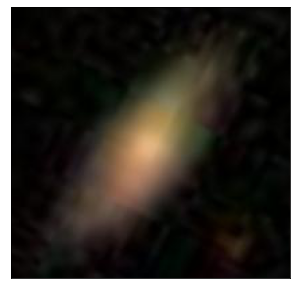

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.imshow(cropped, origin='lower')
ax.set_aspect('auto')
# plt.savefig(path+str(gal_id)+'_gsts2.jpeg', bbox_inches='tight', pad_inches = 0)
# plt.imsave(path+str(gal_id)+'_gsts3.jpeg',lum, cmap="Greys")

plt.show()

In [71]:
%%time
savepath = '/Users/avery/astr211/hw_assignments/project/croppedimgrgb/'

for i in range(0,61578):
    gal_id = df['GalaxyID'][i]
    image = io.imread(path+str(gal_id)+'.jpg')
    cropped = image[114:321,114:321]

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(cropped, origin='lower')
    ax.set_aspect('auto')
    # plt.savefig(path+str(gal_id)+'_gsts2.jpg', bbox_inches='tight', pad_inches = 0)
    plt.imsave(savepath+str(gal_id)+'.jpg',cropped)
    
    plt.close()

#     plt.show()

CPU times: user 23min 40s, sys: 8min 31s, total: 32min 12s
Wall time: 37min 8s


***simple network with cropped images of 207x207 — rgb***

In [72]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/croppedimgrgb/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)


Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [73]:
model = keras.models.Sequential()
# hidden layer
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 89s 61ms/step - loss: 0.7099 - accuracy: 0.6520 - val_loss: 0.6954 - val_accuracy: 0.6294
Epoch 2/20
1451/1451 [==============================] - 90s 62ms/step - loss: 0.6512 - accuracy: 0.6966 - val_loss: 0.6435 - val_accuracy: 0.7173
Epoch 3/20
1451/1451 [==============================] - 88s 60ms/step - loss: 0.6431 - accuracy: 0.7082 - val_loss: 0.6459 - val_accuracy: 0.7250
Epoch 4/20
1451/1451 [==============================] - 86s 59ms/step - loss: 0.6371 - accuracy: 0.7145 - val_loss: 0.6452 - val_accuracy: 0.7153
Epoch 5/20
1451/1451 [==============================] - 102s 70ms/step - loss: 0.6333 - accuracy: 0.7186 - val_loss: 0.6418 - val_accuracy: 0.7056
Epoch 6/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.6307 - accuracy: 0.7209 - val_loss: 0.6362 - val_accuracy: 0.7089
Epoch 7/20
1451/1451 [==============================] - 65s 45ms/step - loss: 0.6282 - accuracy: 0.7206 - val_loss: 0.6323 

In [75]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 24s 2ms/step - loss: 0.6248 - accuracy: 0.7257
Test accuracy: 0.7257000207901001


***CNN with cropped images of 207x207 — rgb***

In [101]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/croppedimgrgb/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(207,207),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)


Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [105]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(207,207,3)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 375s 258ms/step - loss: 0.6356 - accuracy: 0.7655 - val_loss: 0.5996 - val_accuracy: 0.7912
Epoch 2/20
1451/1451 [==============================] - 364s 251ms/step - loss: 0.5940 - accuracy: 0.7972 - val_loss: 0.5981 - val_accuracy: 0.7884
Epoch 3/20
1451/1451 [==============================] - 364s 251ms/step - loss: 0.5836 - accuracy: 0.8119 - val_loss: 0.5999 - val_accuracy: 0.7979
Epoch 4/20
1451/1451 [==============================] - 417s 287ms/step - loss: 0.5713 - accuracy: 0.8293 - val_loss: 0.5972 - val_accuracy: 0.7964
Epoch 5/20
1451/1451 [==============================] - 1084s 748ms/step - loss: 0.5598 - accuracy: 0.8438 - val_loss: 0.6052 - val_accuracy: 0.7857
Epoch 6/20
1451/1451 [==============================] - 309s 213ms/step - loss: 0.5496 - accuracy: 0.8591 - val_loss: 0.6169 - val_accuracy: 0.7813
Epoch 7/20
1451/1451 [==============================] - 3301s 2s/step - loss: 0.5413 - accuracy: 0.8688 - val_l

KeyboardInterrupt: 

In [104]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 60s 6ms/step - loss: 0.6373 - accuracy: 0.7515
Test accuracy: 0.7515000104904175


In [106]:
%%time
history = model.fit(train_generator,epochs=4,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/4
1451/1451 [==============================] - 305s 210ms/step - loss: 0.6424 - accuracy: 0.7332 - val_loss: 0.6202 - val_accuracy: 0.7675
Epoch 2/4
1451/1451 [==============================] - 300s 207ms/step - loss: 0.6002 - accuracy: 0.7857 - val_loss: 0.5965 - val_accuracy: 0.7888
Epoch 3/4
1451/1451 [==============================] - 302s 208ms/step - loss: 0.5893 - accuracy: 0.8026 - val_loss: 0.5969 - val_accuracy: 0.7925
Epoch 4/4
1451/1451 [==============================] - 309s 213ms/step - loss: 0.5799 - accuracy: 0.8147 - val_loss: 0.5945 - val_accuracy: 0.7964
CPU times: user 1h 33min 42s, sys: 31min 40s, total: 2h 5min 22s
Wall time: 20min 16s


In [107]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 61s 6ms/step - loss: 0.5945 - accuracy: 0.7969
Test accuracy: 0.7968999743461609


***CNN with cropped images (207x207) downsized to 69x69 — rgb***

In [81]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/croppedimgrgb/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='rgb', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)


Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [94]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(69,69,3)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 82s 56ms/step - loss: 0.6199 - accuracy: 0.7555 - val_loss: 0.6001 - val_accuracy: 0.7979
Epoch 2/20
1451/1451 [==============================] - 65s 45ms/step - loss: 0.5977 - accuracy: 0.7932 - val_loss: 0.5972 - val_accuracy: 0.7997
Epoch 3/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5888 - accuracy: 0.8034 - val_loss: 0.5861 - val_accuracy: 0.8076
Epoch 4/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5819 - accuracy: 0.8111 - val_loss: 0.5881 - val_accuracy: 0.7960
Epoch 5/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5766 - accuracy: 0.8174 - val_loss: 0.5787 - val_accuracy: 0.8208
Epoch 6/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5726 - accuracy: 0.8211 - val_loss: 0.5810 - val_accuracy: 0.8189
Epoch 7/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5692 - accuracy: 0.8290 - val_loss: 0.5755 -

In [ ]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

In [84]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5422 - accuracy: 0.8679 - val_loss: 0.5818 - val_accuracy: 0.8142
Epoch 2/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5407 - accuracy: 0.8703 - val_loss: 0.5852 - val_accuracy: 0.8113
Epoch 3/20
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5395 - accuracy: 0.8721 - val_loss: 0.5901 - val_accuracy: 0.8047
Epoch 4/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5381 - accuracy: 0.8757 - val_loss: 0.5898 - val_accuracy: 0.7989
Epoch 5/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5369 - accuracy: 0.8769 - val_loss: 0.5988 - val_accuracy: 0.7886
Epoch 6/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5354 - accuracy: 0.8784 - val_loss: 0.5936 - val_accuracy: 0.7943
Epoch 7/20
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5339 - accuracy: 0.8801 - val_loss: 0.5945 -

In [85]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 20s 2ms/step - loss: 0.6141 - accuracy: 0.7902
Test accuracy: 0.7901999950408936


*resetting to ideal number of epochs to avoid overfitting*

In [87]:
%%time
history = model.fit(train_generator,epochs=18,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/18
1451/1451 [==============================] - 66s 46ms/step - loss: 0.6135 - accuracy: 0.7686 - val_loss: 0.5963 - val_accuracy: 0.7983
Epoch 2/18
1451/1451 [==============================] - 66s 46ms/step - loss: 0.5921 - accuracy: 0.7997 - val_loss: 0.5877 - val_accuracy: 0.8090
Epoch 3/18
1451/1451 [==============================] - 66s 45ms/step - loss: 0.5827 - accuracy: 0.8117 - val_loss: 0.5864 - val_accuracy: 0.8137
Epoch 4/18
1451/1451 [==============================] - 69s 48ms/step - loss: 0.5762 - accuracy: 0.8191 - val_loss: 0.5810 - val_accuracy: 0.8148
Epoch 5/18
1451/1451 [==============================] - 68s 47ms/step - loss: 0.5710 - accuracy: 0.8253 - val_loss: 0.5799 - val_accuracy: 0.8195
Epoch 6/18
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5663 - accuracy: 0.8313 - val_loss: 0.5906 - val_accuracy: 0.8022
Epoch 7/18
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5626 - accuracy: 0.8400 - val_loss: 0.5864 -

In [88]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 20s 2ms/step - loss: 0.6056 - accuracy: 0.7938
Test accuracy: 0.7937999963760376


In [92]:
%%time
history = model.fit(train_generator,epochs=11,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/11
1451/1451 [==============================] - 93s 64ms/step - loss: 0.6161 - accuracy: 0.7628 - val_loss: 0.6103 - val_accuracy: 0.7687
Epoch 2/11
1451/1451 [==============================] - 87s 60ms/step - loss: 0.5930 - accuracy: 0.7975 - val_loss: 0.5862 - val_accuracy: 0.8123
Epoch 3/11
1451/1451 [==============================] - 68s 47ms/step - loss: 0.5822 - accuracy: 0.8106 - val_loss: 0.5881 - val_accuracy: 0.7976
Epoch 4/11
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5757 - accuracy: 0.8209 - val_loss: 0.5852 - val_accuracy: 0.8080
Epoch 5/11
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5704 - accuracy: 0.8269 - val_loss: 0.5772 - val_accuracy: 0.8179
Epoch 6/11
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5660 - accuracy: 0.8336 - val_loss: 0.5873 - val_accuracy: 0.8016
Epoch 7/11
1451/1451 [==============================] - 68s 47ms/step - loss: 0.5619 - accuracy: 0.8377 - val_loss: 0.5827 -

In [93]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 20s 2ms/step - loss: 0.5817 - accuracy: 0.8141
Test accuracy: 0.8141000270843506


In [95]:
%%time
history = model.fit(train_generator,epochs=10,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/10
1451/1451 [==============================] - 67s 46ms/step - loss: 0.6280 - accuracy: 0.7441 - val_loss: 0.6167 - val_accuracy: 0.7683
Epoch 2/10
1451/1451 [==============================] - 67s 46ms/step - loss: 0.6026 - accuracy: 0.7869 - val_loss: 0.5998 - val_accuracy: 0.7933
Epoch 3/10
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5943 - accuracy: 0.7958 - val_loss: 0.5920 - val_accuracy: 0.8084
Epoch 4/10
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5875 - accuracy: 0.8059 - val_loss: 0.5907 - val_accuracy: 0.8045
Epoch 5/10
1451/1451 [==============================] - 68s 47ms/step - loss: 0.5822 - accuracy: 0.8134 - val_loss: 0.5860 - val_accuracy: 0.8005
Epoch 6/10
1451/1451 [==============================] - 67s 46ms/step - loss: 0.5780 - accuracy: 0.8186 - val_loss: 0.5885 - val_accuracy: 0.8121
Epoch 7/10
1451/1451 [==============================] - 68s 47ms/step - loss: 0.5728 - accuracy: 0.8248 - val_loss: 0.5797 -

In [96]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 20s 2ms/step - loss: 0.5893 - accuracy: 0.8097
Test accuracy: 0.8097000122070312


***CNN with cropped images (207x207) downsized to 69x69 — grayscale***

In [97]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)
testgen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
path = '/Users/avery/astr211/hw_assignments/project/croppedimgrgb/'

bs = 32 # batch size for training 
valid_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='validation', shuffle=False)

train_generator=datagen.flow_from_dataframe(traindf, directory=path, x_col='GalaxyID',
                                            y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale',class_mode='raw',
                                            batch_size=bs, interpolation='bilinear',
                                            subset='training', shuffle=False)

test_generator=testgen.flow_from_dataframe(testdf, directory=path, x_col='GalaxyID',
                                           y_col=['Class1.1','Class1.2'], target_size=(69,69),
                                            color_mode='grayscale', class_mode='raw',
                                            batch_size=1, interpolation='bilinear', shuffle=False)


Found 5157 validated image filenames.
Found 46421 validated image filenames.
Found 10000 validated image filenames.


In [98]:
model = keras.models.Sequential()
# hidden layer

# model.add(keras.layers.Dense(75, input_shape=(424,424), activation='relu'))
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(69,69,1)))
model.add(keras.layers.MaxPooling2D((2, 2))) # MaxPooling layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))

# output layer of 2 classes 
model.add(keras.layers.Dense(units=2, activation='sigmoid'))
# cost function and metric
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
%%time
history = model.fit(train_generator,epochs=20,validation_data=valid_generator,
               validation_freq=1,verbose=1)

Epoch 1/20
1451/1451 [==============================] - 62s 43ms/step - loss: 0.6357 - accuracy: 0.7261 - val_loss: 0.6221 - val_accuracy: 0.7646
Epoch 2/20
1451/1451 [==============================] - 62s 43ms/step - loss: 0.6165 - accuracy: 0.7668 - val_loss: 0.6131 - val_accuracy: 0.7758
Epoch 3/20
1451/1451 [==============================] - 62s 43ms/step - loss: 0.6064 - accuracy: 0.7834 - val_loss: 0.6080 - val_accuracy: 0.7803
Epoch 4/20
1451/1451 [==============================] - 63s 43ms/step - loss: 0.5965 - accuracy: 0.7986 - val_loss: 0.5996 - val_accuracy: 0.7974
Epoch 5/20
1451/1451 [==============================] - 63s 44ms/step - loss: 0.5871 - accuracy: 0.8081 - val_loss: 0.5881 - val_accuracy: 0.8059
Epoch 6/20
1451/1451 [==============================] - 63s 43ms/step - loss: 0.5814 - accuracy: 0.8152 - val_loss: 0.5917 - val_accuracy: 0.7985
Epoch 7/20
1451/1451 [==============================] - 63s 44ms/step - loss: 0.5773 - accuracy: 0.8190 - val_loss: 0.5881 -

In [100]:
score = model.evaluate(test_generator, return_dict=True)
print('Test accuracy:', score['accuracy'])

10000/10000 [==============================] - 19s 2ms/step - loss: 0.5937 - accuracy: 0.7912
Test accuracy: 0.7911999821662903


## final conclusions

In [113]:
! conda install openpyxl -y

Solving environment: done

## Package Plan ##

  environment location: /Users/avery/miniforge3/envs/a211env

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    et_xmlfile-1.0.1           |          py_1001          11 KB  conda-forge
    openpyxl-3.0.9             |     pyhd8ed1ab_0         153 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         164 KB

The following NEW packages will be INSTALLED:

  et_xmlfile         conda-forge/noarch::et_xmlfile-1.0.1-py_1001
  openpyxl           conda-forge/noarch::openpyxl-3.0.9-pyhd8ed1ab_0



openpyxl-3.0.9       | 153 KB    | ##################################### | 100% 
et_xmlfile-1.0.1     | 11 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing trans

In [122]:
allaccuracies = pd.read_excel('allacc.xlsx')
allaccuracies

,training data type,Simple Network Test Accuracy,Convoluted Network Test Accuracy
0,grayscale 424x424,0.6839,-
1,rgb 424x424,-,0.719
2,gray 424x424 downsized to 69x69,-,0.7904
3,rgb 424x424 downsized to 69x69,-,0.8144
4,rgb cropped to 207x207,0.7257,0.7969
5,rgb cropped to 207x207 downsized to 69x69,-,0.8141
6,gray cropped to 207x207 downsized to 69x69,-,0.7912


Although only demonstrated on one image type, convoluted neural networks are clearly more accurate than simple networks. However, I noticed that convoluted neural networks have their own setbacks as well. In addition to requiring more time to train, overfitting occurs more quickly within these networks as well. Once it begins occurring, the validation accuracy decreases dramatically, causing training of these networks to require more attention than the simple ones. However, the increase in accuracy in comparison to simple networks makes them worth it. RGB images were consistently more accurate than gray, so I primarily trained with those. Cropping the images had a significant impact on accuracy in hte convoluted neural network. The RGB training images at their original size of 424x424 and these images cropped to 207x207 had test accuracies of 0.7190 and 0.7969, respectively. This is a clear demonstration of the network's accuracy improving with cropped images. Another image alteration which assisted in improving the accuracy was downsizing to 69x69. In the CNN, the RGB training images at 424x424 resulted in a test accuracy of 0.719, while these images downsized to 69x69 resulted in a test accuracy of 0.8144. Again, making the images smaller improved the accuracy, even when no cropping occurred. There is not much of a difference between the test accuracies of 424x424 images downsized to 69x69 and those of the images cropped to 207x207 and then downsized to 69x69. If I had more time and access to a GPU, it would be interesting to try different network architectures or more fully compare the two networks. 